In [24]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

### Generating the Dataset

In [25]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [26]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-0.01474871  0.5361633 ], shape=(2,), dtype=float32) 
label: tf.Tensor([2.3331347], shape=(1,), dtype=float32)


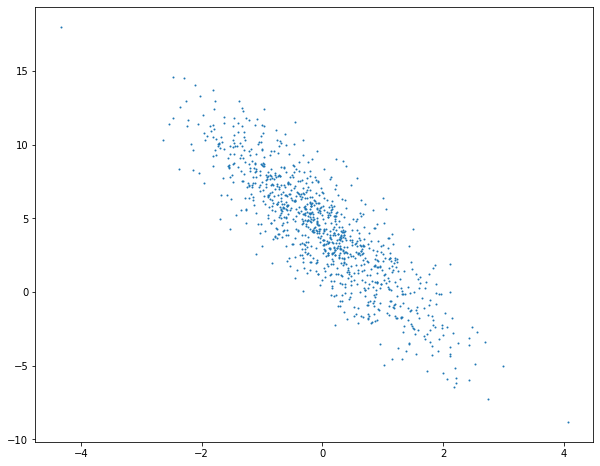

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

### Reading the Dataset

In [28]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [29]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 0.60953885 -1.2230754 ]
 [ 1.0806274  -1.6255631 ]
 [-0.21760024  0.4166742 ]
 [-0.43624878 -0.48074856]
 [-0.45724756 -0.6817739 ]
 [-0.76568615 -0.10163084]
 [ 0.546358    0.61451817]
 [ 1.0787476  -0.86674154]
 [ 1.4191428   0.3950354 ]
 [-0.20573978  1.3334508 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 9.585676 ]
 [11.873839 ]
 [ 2.3563926]
 [ 4.977205 ]
 [ 5.6067853]
 [ 3.014644 ]
 [ 3.1865306]
 [ 9.308247 ]
 [ 5.6993303]
 [-0.7380853]], shape=(10, 1), dtype=float32)


### Initializing Model Parameters

In [30]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [31]:
w, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.01020052],
        [-0.02132658]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

### Defining the Model

In [32]:
def linreg(X, w, b):
    """The linear regression model."""
    return tf.matmul(X, w) + b

### Defining the Loss Function

In [33]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

### Defining the Optimization Algorithm

In [34]:
def sgd(params, grads, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

### Training

In [35]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.042346
epoch 2, loss 0.000165
epoch 3, loss 0.000053


In [36]:
# updated weights and biases
w, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.9999689],
        [-3.4001586]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.200299], dtype=float32)>)

In [37]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [3.1113625e-05 1.5854836e-04]
error in estimating b: [-0.00029898]
